## Installation

We will need to install a number of libraries to start with.

In [1]:
import networkx as nx
!pip install transformers
!pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 95.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 119.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 22.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.7 MB/s eta 0:00:00


We use flan alpaca model for speed and local execution.

In [2]:
from transformers import pipeline

prompt = "Write an email about an alpaca that likes flan"
model = pipeline(model="declare-lab/flan-alpaca-xl", device=0)
model(prompt, max_length=128, do_sample=True)

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

[{'generated_text': "Dear Alpaca, I have a wonderful, sweet alpaca named Bambi. I have always had a passion for making flans, because they are so creamy and delicious! Unfortunately, I don't make these things often enough due to time constraints. But when I do have some time, I make this delicious flan for the alpaca to enjoy! I usually keep it in the freezer, but if I have a craving for it, I will never turn it down! In addition, I also make myself some at home, which makes it easy to please this alpaca! Do"}]

In [4]:
from transformers import pipeline
import networkx as nx
prompt = '''### Instruction:
Who is the first person on the moon?

### Response:'''
def generate(prompt):
  output = model(prompt, do_sample=True, min_length=10, max_length=len(prompt)+128)
  out = output[0]['generated_text']
  if '### Response:' in out:
    out = out.split('### Response:')[1]
  if '### Instruction:' in out:
    out = out.split('### Instruction:')[0]
  return out

## World Description
We describe the world below. We will generate prompts based on this information. The simulation is that of the town of Phandalin, southwest of Neverwinter. This area is chosen because it is easily extendable with multiple regions for a "player" to be able to explore the world once the simulation is done.

In [5]:
world_graph = nx.Graph()

prompt_meta = '''### Instruction:
{}

### Response:'''

town_areas = ["Barthen's Provisions", "Lionshield Coster", "Stonehill Inn", "Phandalin Town Square"]
town_areas = {"Phandalin Town Square": 'Town square of the town of Phandalin.',
              'Stonehill Inn': "In the center of town stands a large, newly built roadhouse of fieldstone and rough-hewn timbers. The common room is filled with locals nursing mugs of ale or cider, all of them eyeing you with curiosity.",
              "Barthen's Provisions": "Barthen’s is the biggest trading post in Phandalin. Its shelves stock most ordinary goods and supplies, including backpacks, bedrolls, rope, and rations. The place is open from sunup to sundown.",
              "Edermath Orchard": "A tidy little cottage beside an apple orchard.",
              "Lionshield Coster": "Hanging above the front door of this modest trading post is a sign shaped like a wooden shield with a blue lion painted on it. This building is owned by the Lionshields, a merchant company based in the city of Yartar, over a hundred miles to the east. They ship finished goods to Phandalin and other small settlements throughout the region, but this outpost has been hard hit by banditry. The most recent Lionshield caravan due in Phandalin never arrived.",
              "Phandalin Miner's Exchange": "The Miner’s Exchange is a trading post where local miners have their valuable finds weighed, measured, and paid out. In the absence of any local lord or authority, the exchange also serves as an unofficial records office, registering claims to various streams and excavations around the area. There isn’t any real gold rush in Phandalin, but enough wealth is hidden in the nearby streams and valleys to support a good number of independent prospectors. The exchange is a great place to meet people who spend a lot of time out and about in the countryside surrounding Phandalin. The guildmaster is an ambitious and calculating human woman named Halia Thornton.",
              "Alderleaf Farm": "A farm owned by the helpful halfling farmer, Qelline Alderleaf.",
              "Shrine of Luck": "Phandalin's only temple is a small shrine made of stones taken from the nearby ruins. It is dedicated to Tymora, goddess of luck and good fortune.",
              "The Sleeping Giant": "This rundown tap house is a dirty, dangerous watering hole at the end of Phandalin’s main street. It is frequented by Redbrand thugs and operated by a surly female dwarf named Grista.",
              "Townmaster’s Hall": "The townmaster’s hall has sturdy stone walls, a pitched wooden roof, and a bell tower at the back. Posted on a board next to the front door is a notice written in Common. It reads: “REWARD — Orcs near Wyvern Tor! Those of a mind to face the orc menace should inquire within.” The notice bears the town’s seal and an indecipherable signature.",
              "Tresendar Manor": "A ruined manor. The Redbrands’ base in Phandalin is a dungeon complex under Tresendar Manor. Before the manor was ruined, its cellars served as safe storage for food and water in the event that the estate was attacked, while an adjoining crypt provided a resting place for the deceased members of the Tresendar family. The Redbrands have since expanded the cellars to suit their own purposes, adding slave pens, workshops, and barracks."
              }
town_people = {"Toblen Stonehill": "Owns a trading post.", 
               "Daran Edermath": "Daran Edermath is a retired adventurer who lives in a tidy little cottage beside an apple orchard. A fit, silver-haired half-elf well over a hundred years old, Daran is a fighter who served as a marshal and herald for many years in the lands of the Dragon Coast, far to the southeast. Upon retiring, he returned to the Neverwinter region, his original home.",  
               "Linene Graywind": "Runs a trading post.",  
               "Halia Thornton": "An ambitious and calculating human woman. She is the guildmaster of Phandalin Miner’s Exchange, a trading post where local miners have their valuable finds weighed, measured, and paid out. In her attempts to establish the Miner's Exchange as the closest thing the town has to a governing authority, she acts as more than a simple merchant.",  
               "Qelline Alderleaf": "A wise female halfling of forty-five, Qelline Alderleaf is a pragmatic farmer who seems to know everything that goes on in town. She is a kind host, and is willing to let the characters stay in her hayloft if they don't want to stay at the Stonehill Inn.",  
               "Sister Garaele": "Elf cleric of Tymora and Harper agent.", 
               "Harbin Wester": "Townmaster of Phandalin. A pompous, old food. Phandalin has no functioning government, but the townsfolk elect someone to serve as townmaster each year. The townmaster serves as a judge in minor disputes and keeps any records that need to be kept.",
               "Terrill Five Fingers": "A human ruffian. He wears a grimy scarlet cloak. He is a member of the Redbrand ruffians. He doesn't like adventurers, and wants to rob and kill them.",
               "Conrad Scarface": "A human ruffian. He wears a grimy scarlet cloak. He is a member of the Redbrand ruffians. He doesn't like adventurers, and wants to rob and kill them.",
               "Robbing Nellie": "A human ruffian. She wears a grimy scarlet cloak. She is a member of the Redbrand ruffians. She doesn't like adventurers, and wants to rob and kill them.",
               "Valerie the Grin": "A human ruffian. She wears a grimy scarlet cloak. She is a member of the Redbrand ruffians. She doesn't like adventurers, and wants to rob and kill them.",
               }
for town_area in town_areas.keys():
  world_graph.add_node(town_area)
  world_graph.add_edge(town_area, town_area)
for town_area in town_areas.keys():
  world_graph.add_edge(town_area, "Phandalin Town Square")
locations = {}
for i in town_people.keys():
  locations[i] = "Phandalin Town Square"


memories = {}
for i in town_people.keys():
  memories[i] = []
plans = {}
for i in town_people.keys():
  plans[i] = []

global_time = 8
def generate_description_of_area(x):
  text = "It is "+str(global_time)+":00. The location is "+x+"."
  people = []
  for i in locations.keys():
    if locations[i] == x:
      people.append(i)


In [6]:
compressed_memories_all = {}
for name in town_people.keys():
  compressed_memories_all[name] = []

In [7]:
for name in town_people.keys():
  prompt = "You are {}. The following is your description: {} You just woke up. What is your goal for today? Write it down in an hourly basis, starting at {}:00. Write only one or two very short sentences. Be very brief. Use at most 50 words.".format(name, town_people[name], str(global_time))
  plans[name] = generate(prompt_meta.format(prompt))
  print(name, plans[name])

Toblen Stonehill Toblen Stonehill: 1. Prepare breakfast 2. Make coffee & toast 3. Read the morning paper & catch up on reading. 4. Start the day by doing some errands and doing some exercises. 5. Finish the day off with dinner. 6. Set aside some time for yourself to practice meditation & relax. 7. Study the day ahead. 8. Do something to make someone’s day better.
Daran Edermath Daily Goal: 1. Start my day on a positive note. 2. Spend the rest of the week refining my skills. 3. Enjoy the apple orchard I live beside. 4. Take notes from a book I was reading. 5. Go for a jog.
Linene Graywind Linene Graywind in the morning: -8:30 A.M.: Go to market to buy supplies. -9:00 A.M.: Spend a few minutes at the market. 11: PM: Send a few more orders to the trader I'm working with.
Halia Thornton Halia Thornton: 8am: Achieve all tasks listed in my daily plan. 8:15am: Finish tasks for the day such as logging transactions and compiling reports. 8:25am: Gather resources needed to complete tasks listed 

/usr/local/lib/python3.9/dist-packages/transformers/pipelines/base.py:1070: UserWarning: You seem to be using the pipelines sequentially on GPU. In order to maximize efficiency please use a dataset
  warnings.warn(


Robbing Nellie Today is the day to try and rob Nellie. I plan to steal the treasure box at 8 am. At 9 am, I will break into the bank and start a search for the bounty. Between 10 and 12 pm, I will reach the bank at 14 pm. I will collect the money and prepare it for the night. Following my raid, I will head back to the bank.
Valerie the Grin She woke up at 8:50 AM with the intention of escaping town without attracting attention. She wanted to keep her enemies from chasing after her. She then woke up at 10 AM and decided to start a new dawn by running to a nearby river where she can take on the dangerous adventurers.


In [8]:
action_prompts = {}
for location in town_areas.keys():
  people = []
  for i in town_people.keys():
    if locations[i] == location:
      people.append(i)
  
  for name in people:
    prompt = "You are {}. Your plans are: {}. You are currently in {} with the following description: {}. It is currently {}:00. The following people are in this area: {}. You can interact with them.".format(name, plans[name], location, town_areas[location], str(global_time), ', '.join(people))
    people_description = []
    for i in people:
      people_description.append(i+': '+town_people[i])
    prompt += ' You know the following about people: ' + '. '.join(people_description)
    memory_text = '. '.join(memories[name][-10:])
    prompt += "What do you do in the next hour? Use at most 10 words to explain."
    action_prompts[name] = prompt

In [9]:
action_results = {}
for name in town_people.keys():
  action_results[name] = generate(prompt_meta.format(action_prompts[name]))
  # Now clean the action
  prompt = """
  Convert the following paragraph to first person past tense:
  "{}"
  """.format(action_results[name])
  action_results[name] = generate(prompt_meta.format(prompt)).replace('"', '').replace("'", '')
  print(name, action_results[name])

Token indices sequence length is longer than the specified maximum sequence length for this model (866 > 512). Running this sequence through the model will result in indexing errors


Toblen Stonehill I prepared breakfast and toast in the next hour. I read the morning paper before starting the day. I started the day by doing some errands and doing some exercises. I finished the day off with dinner. I set aside some time for myself to practice meditation. I studied the day ahead. I did something to make someone’s day better.
Daran Edermath I took notes before I left Phandalin.
Linene Graywind I went to the market to buy supplies. I got to the market before 9:30 am.
Halia Thornton I worked on finishing yesterdays tasks, enlisting new merchants, and settling disputes with rivals.
Qelline Alderleaf Qelline started her day by prepping her breakfast. Then, she made calls to friends and family to check in on them. Then, she started to write her blog posts about the town. Next, she chatted with Sister Garaele and Harbin Wester about their morning plans. Qelline finished her blog posts later in the day.
Sister Garaele I did this task for the second hour.
Harbin Wester Harbin

Collect the memories people observe.

In [10]:
action_prompts = {}
for location in town_areas.keys():
  people = []
  for i in town_people.keys():
    if locations[i] == location:
      people.append(i)
  
  for name in people:
    for name_two in people:
      memories[name].append('[Time: {}. Person: {}. Memory: {}]\n'.format(str(global_time), name_two, action_results[name_two]))

# Rank Memories

In [11]:
import re
def get_rating(x):
  nums = [int(i) for i in re.findall(r'\d+', x)]
  if len(nums)>0:
    return min(nums)
  else:
    return None

In [12]:
memory_ratings = {}
for name in town_people.keys():
  memory_ratings[name] = []
  for i, memory in enumerate(memories[name]):
    prompt = "You are {}. Your plans are: {}. You are currently in {}. It is currently {}:00. You observe the following: {}. Give a rating, between 1 and 5, to how much you care about this.".format(name, plans[name], locations[name], str(global_time), memory)
    res = generate(prompt_meta.format(prompt))
    rating = get_rating(res)
    max_attempts = 2
    current_attempt = 0
    while rating is None and current_attempt<max_attempts:
      rating = get_rating(res)
      current_attempt += 1
    if rating is None:
      rating = 0
    memory_ratings[name].append((res, rating))
  print(memory_ratings[name])

[('4/5. I care deeply bc I understand what it means to balance a routine and be able to make my own decisions in life. I am looking forward to being more mindful throughout my life.', 4), ("3 (Caring) - I can only care about the time, not the person or the background, but I'm conscious of the moment and have taken notes.", 3), ('3 (I care about it but it would be better to have it in a different form)', 3), ('Rating: 3/5. Toblen Stonehill observes that Halia Thornton is working hard and seems like she has achieved a good amount of goals this morning, so this makes him want to get in the game and learn more.', 3), ("2 Toblen Stonehill: This is an excellent example of how to start the day. We can learn a lot from her actions and it shows the importance of taking time for meaningful activities like this. We can also see why this is important to her; her actions demonstrate how commitment to her goals can make her life better. It's a great reminder to us to put ourselves first and be compa

# Compress Memories

In [13]:
MEMORY_LIMIT = 10
compressed_memories = {}
for name in town_people.keys():
  memories_sorted = sorted(
        memory_ratings[name], 
        key=lambda x: x[1]
    )[::-1]
  relevant_memories = memories_sorted[:MEMORY_LIMIT]
  # print(name, relevant_memories)
  memory_string_to_compress = '.'.join([a[0] for a in relevant_memories])
  prompt = "You are {}. Your plans are: {}. You are currently in {}. It is currently {}:00. You observe the following: {}. Summarize these memories in one sentence.".format(name, plans[name], locations[name], str(global_time), memory_string_to_compress)
  res = generate(prompt_meta.format(prompt))
  compressed_memories[name] = '[Recollection at Time {}:00: {}]'.format(str(global_time), res)
  compressed_memories_all[name].append(compressed_memories[name])

In [14]:
place_ratings = {}

for name in town_people.keys():
  place_ratings[name] = []
  for area in town_areas.keys():
    prompt = "You are {}. Your plans are: {}. You are currently in {}. It is currently {}:00. You have the following memories: {}. Give a rating, between 1 and 5, to how likely you are likely to be at {} the next hour.".format(name, plans[name], locations[name], str(global_time), compressed_memories[name], area)
    res = generate(prompt_meta.format(prompt))
    rating = get_rating(res)
    max_attempts = 2
    current_attempt = 0
    while rating is None and current_attempt<max_attempts:
      rating = get_rating(res)
      current_attempt += 1
    if rating is None:
      rating = 0
    place_ratings[name].append((area, rating, res))
  place_ratings_sorted = sorted(
      place_ratings[name], 
      key=lambda x: x[1]
  )[::-1]
  if place_ratings_sorted[0][0] != locations[name]:
    new_recollection = '[Recollection at Time {}:00: {}]'.format(str(global_time), 'I then moved to {}.'.format(place_ratings_sorted[0][0]))
    compressed_memories_all[name].append(new_recollection)
  locations[name] = place_ratings_sorted[0][0]


In [35]:
import matplotlib.pyplot as plt
from IPython.display import clear_output, display



def plot_town_areas(global_time,locations, town_people_coords):
    town_people_color = 'red'
    town_people_marker = 'x'
    
    fig, ax = plt.subplots(figsize=(8, 6))
    
    ax.clear()

    for name, (x, y) in locations.items():
        ax.scatter(x, y, label=name)
        ax.text(x, y + 0.1, name)

    for name, (x, y) in town_people_coords.items():
        ax.scatter(x, y, color=town_people_color, marker=town_people_marker)
        ax.text(x + 0.1, y + 0.5, name)

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_title(str(global_time)+":00")



    town_areas_coords = {
        "Phandalin Town Square": (0, 0),
        "Stonehill Inn": (2, 1),
        "Barthen's Provisions": (-1, 3),
        "Edermath Orchard": (2, 2),
        "Lionshield Coster": (-1, -1),
        "Phandalin Miner's Exchange": (3, -2),
        "Alderleaf Farm": (-1, -3),
        "Shrine of Luck": (2, -2),
        "The Sleeping Giant": (-4, 4),
        "Townmaster’s Hall": (4, 4),
        "Tresendar Manor": (0, 4)
    }

    town_people_coords = {
        "Toblen Stonehill": (0, 1),
        "Daran Edermath": (-3, 1),
        "Linene Graywind": (-1, -2),
        "Halia Thornton": (3, -1),
        "Qelline Alderleaf": (0, -3),
        "Sister Garaele": (1, -1),
        "Harbin Wester": (4, 3)
    }
    return fig

# Put it all together

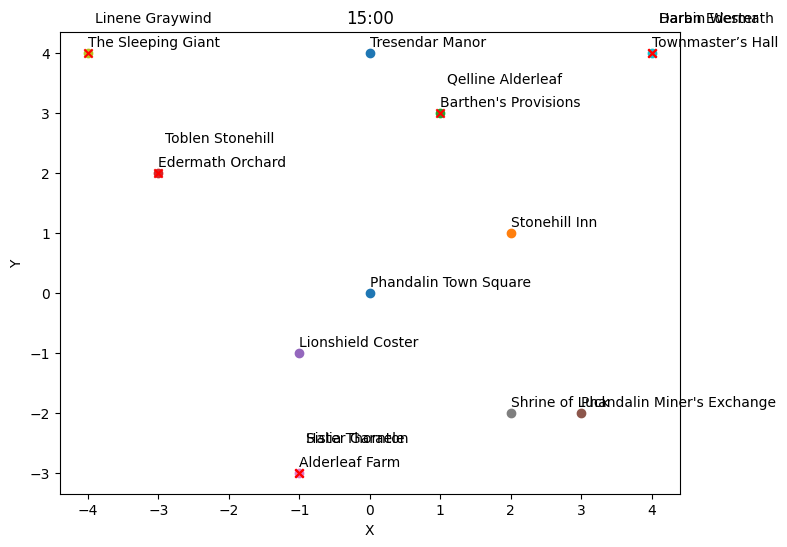

在15:00的时候， Terrill Five Fingers:在狮盾Coster,我和其他恶棍一起参加了今晚的聚会。
在15:00的时候， Conrad Scarface:在幸运神殿,我与康拉德·疤面煞星进行了互动，以获得他们的信任。
在15:00的时候， Robbing Nellie:在斯通希尔旅馆,我在公共休息室遇到了Robbing Nellie和Valerie the Grin。内莉在那里等我，问我是否知道她抢劫小镇的计划。我很好奇她对我和她有什么想法。在我离开之前，我们进行了简短的交谈并交换了几句话。
在15:00的时候， Valerie the Grin:在斯通希尔旅馆,我进入了斯通希尔旅馆。然后我去了Robbing Nellies。我们交换了几句话，我做了自我介绍。然后我们聊了一会儿，了解当天的活动，并谈论即将发生的事情。几分钟后，Robbing Nellie和我分开了。


In [ ]:

fig = plot_town_areas(global_time,town_areas_coords, town_people_coords)
display(fig)
for repeats in range(5):
  global_time += 1
  action_prompts = {}
  for location in town_areas.keys():
    people = []
    for i in town_people.keys():
      if locations[i] == location:
        people.append(i)
    
    for name in people:
      prompt = "You are {}. Your plans are: {}. You are currently in {} with the following description: {}. Your memories are: {}. It is currently {}:00. The following people are in this area: {}. You can interact with them.".format(name, plans[name], location, town_areas[location], '\n'.join(compressed_memories_all[name][-5:]), str(global_time), ', '.join(people))
      people_description = []
      for i in people:
        people_description.append(i+': '+town_people[i])
      prompt += ' You know the following about people: ' + '. '.join(people_description)
      memory_text = '. '.join(memories[name][-10:])
      prompt += "What do you do in the next hour? Use at most 10 words to explain."
      action_prompts[name] = prompt
  action_results = {}
  for name in town_people.keys():
    action_results[name] = generate(prompt_meta.format(action_prompts[name]))
    # Now clean the action
    prompt = """
    Convert the following paragraph to first person past tense:
    "{}"
    """.format(action_results[name])
    action_results[name] = generate(prompt_meta.format(prompt)).replace('"', '').replace("'", '')
    print(name, locations[name], global_time, action_results[name])
    person_name, building_name = name,locations[name]
    if person_name in town_people_coords and building_name in town_areas_coords:
      town_people_coords[person_name] = town_areas_coords[building_name]
      fig = plot_town_areas(global_time,town_areas_coords, town_people_coords)
      clear_output(wait=True)
      display(fig)
  action_prompts = {}
  for location in town_areas.keys():
    people = []
    for i in town_people.keys():
      if locations[i] == location:
        people.append(i)
    
    for name in people:
      for name_two in people:
        memories[name].append('[Time: {}. Person: {}. Memory: {}]\n'.format(str(global_time), name_two, action_results[name_two]))

  memory_ratings = {}
  for name in town_people.keys():
    memory_ratings[name] = []
    for i, memory in enumerate(memories[name]):
      prompt = "You are {}. Your plans are: {}. Your memories are: {}. You are currently in {}. It is currently {}:00. You observe the following: {}. Give a rating, between 1 and 5, to how much you care about this.".format(name, plans[name], '\n'.join(compressed_memories_all[name][-5:]), locations[name], str(global_time), memory)
      res = generate(prompt_meta.format(prompt))
      rating = get_rating(res)
      max_attempts = 2
      current_attempt = 0
      while rating is None and current_attempt<max_attempts:
        rating = get_rating(res)
        current_attempt += 1
      if rating is None:
        rating = 0
      memory_ratings[name].append((res, rating))

  MEMORY_LIMIT = 10
  compressed_memories = {}
  for name in town_people.keys():
    memories_sorted = sorted(
          memory_ratings[name], 
          key=lambda x: x[1]
      )[::-1]
    relevant_memories = memories_sorted[:MEMORY_LIMIT]
    memory_string_to_compress = '.'.join([a[0] for a in relevant_memories])
    prompt = "You are {}. Your plans are: {}. You are currently in {}. It is currently {}:00. You observe the following: {}. Summarize these memories in one sentence.".format(name, plans[name], locations[name], str(global_time), memory_string_to_compress)
    res = generate(prompt_meta.format(prompt))
    compressed_memories[name] = '[Recollection at Time {}:00: {}]'.format(str(global_time), res)
    compressed_memories_all[name].append(compressed_memories[name])

  place_ratings = {}

  for name in town_people.keys():
    place_ratings[name] = []
    for area in town_areas.keys():
      prompt = "You are {}. Your plans are: {}. You are currently in {}. It is currently {}:00. You have the following memories: {}. Give a rating, between 1 and 5, to how likely you are likely to be at {} the next hour.".format(name, plans[name], locations[name], str(global_time), compressed_memories[name], area)
      res = generate(prompt_meta.format(prompt))
      rating = get_rating(res)
      max_attempts = 2
      current_attempt = 0
      while rating is None and current_attempt<max_attempts:
        rating = get_rating(res)
        current_attempt += 1
      if rating is None:
        rating = 0
      place_ratings[name].append((area, rating, res))
    place_ratings_sorted = sorted(
        place_ratings[name], 
        key=lambda x: x[1] )[::-1]
    if place_ratings_sorted[0][0] != locations[name]:
      new_recollection = '[Recollection at Time {}:00: {}]'.format(str(global_time), 'I then moved to {}.'.format(place_ratings_sorted[0][0]))
      compressed_memories_all[name].append(new_recollection)
    locations[name] = place_ratings_sorted[0][0]
